In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import *
import scikitplot as skplt
import statsmodels.tools as sm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, roc_auc_score
from collections import Counter

In [2]:
data=pd.read_csv("default.csv")

In [3]:
data.shape

(1000, 21)

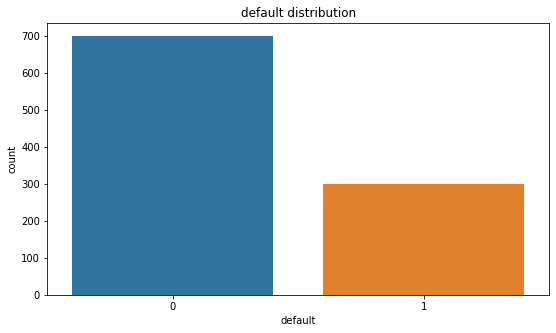

In [4]:
#let's visualise the distribution of default
plt.figure(figsize=(9,5))
sns.countplot(data.default)
plt.title("default distribution")
plt.show()

In [5]:
data.default.value_counts(normalize=True).mul(100).rename("default distribution in percentage")

0    70.0
1    30.0
Name: default distribution in percentage, dtype: float64

In [6]:
#checking number of duplicates, missing values and single valued columns
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 0
Missing values: 0
Single valued columns: Index([], dtype='object')


In [7]:
print("Missing values:", data['savings'].isna().sum().sum())

Missing values: 0


In [8]:
data.groupby("purpose")["default"].mean()

purpose
(vacation - does not exist?)    0.440000
business                        0.350515
car (new)                       0.380342
car (used)                      0.165049
domestic appliances             0.221429
education                       0.363636
furniture/equipment             0.416667
radio/television                0.320442
repairs                         0.333333
retraining                      0.111111
Name: default, dtype: float64

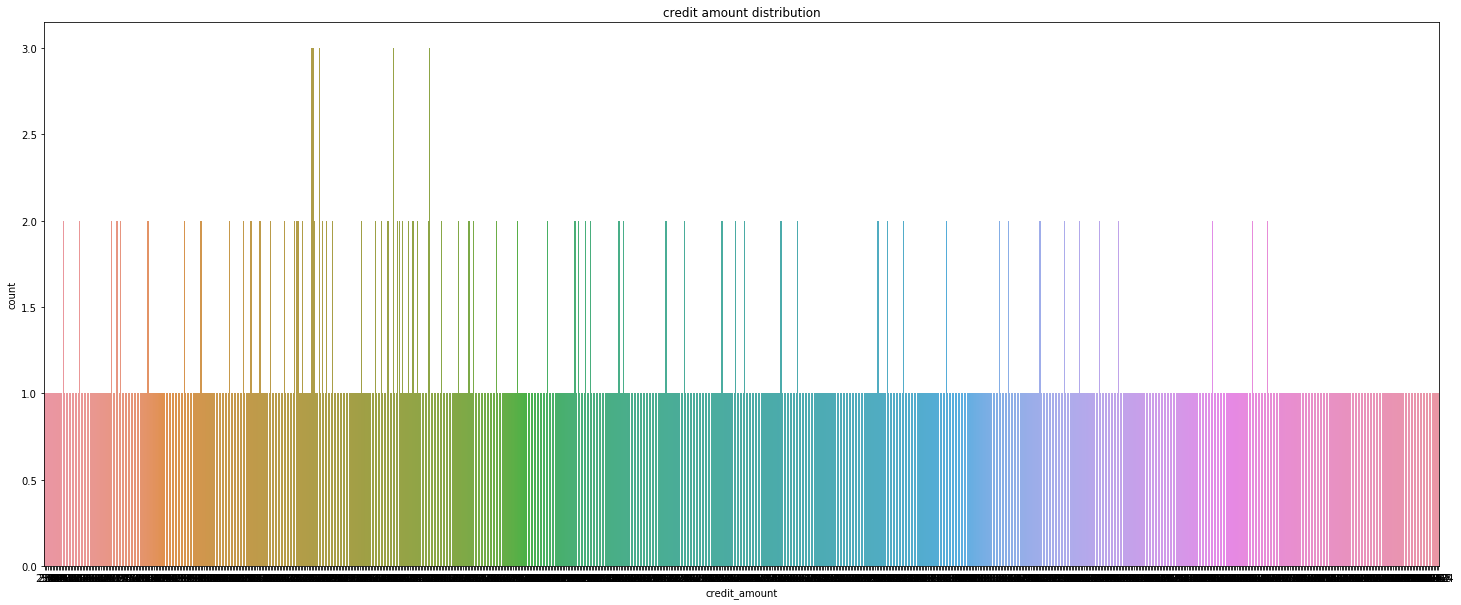

In [9]:
plt.figure(figsize=(25,10))
sns.countplot(data.credit_amount)
plt.title("credit amount distribution")
plt.show()

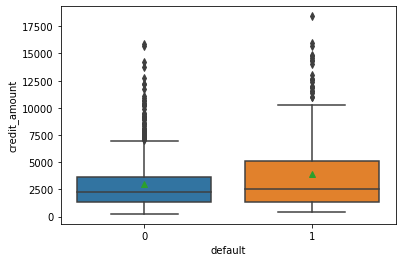

In [10]:
sns.boxplot(data=data,y='credit_amount', x="default", showmeans=True)
plt.show()


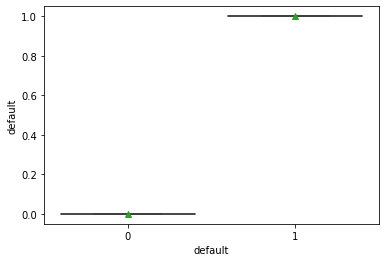

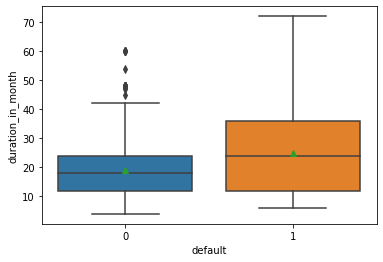

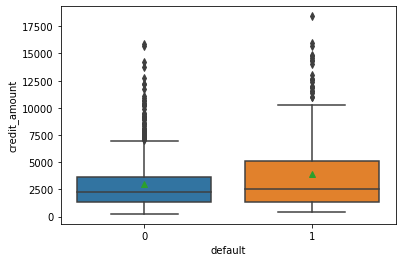

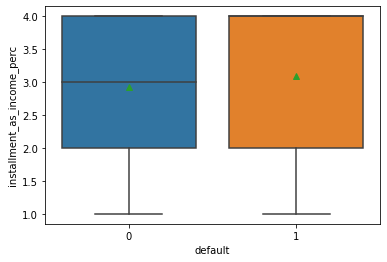

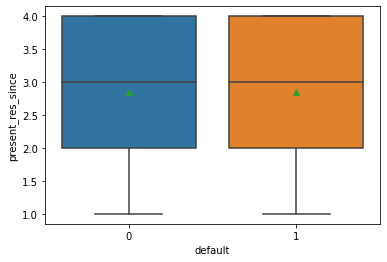

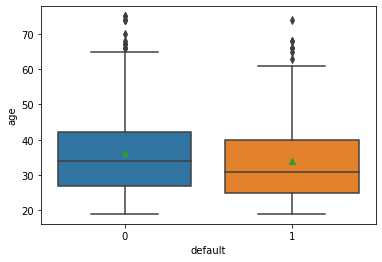

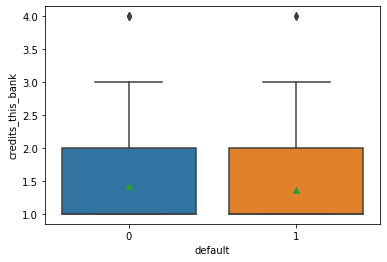

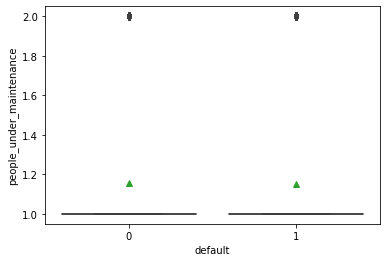

In [11]:
for i in data.dtypes[data.dtypes!="O"].index.tolist():
    sns.boxplot(data=data,y=i,x="default", showmeans=True)
    plt.show()

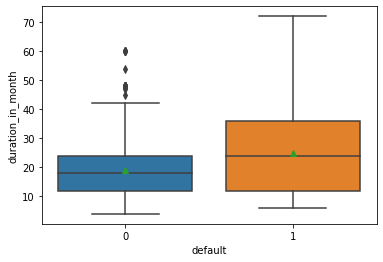

In [13]:
sns.boxplot(data=data,y='duration_in_month', x="default", showmeans=True)
plt.show()

In [14]:
rates_list=[]
for i in data.dtypes[data.dtypes=="O"].index.tolist():
    rates=data.groupby(i)["default"].value_counts(normalize=True).rename("percentage").mul(100).reset_index()
    rates_list.append(rates)

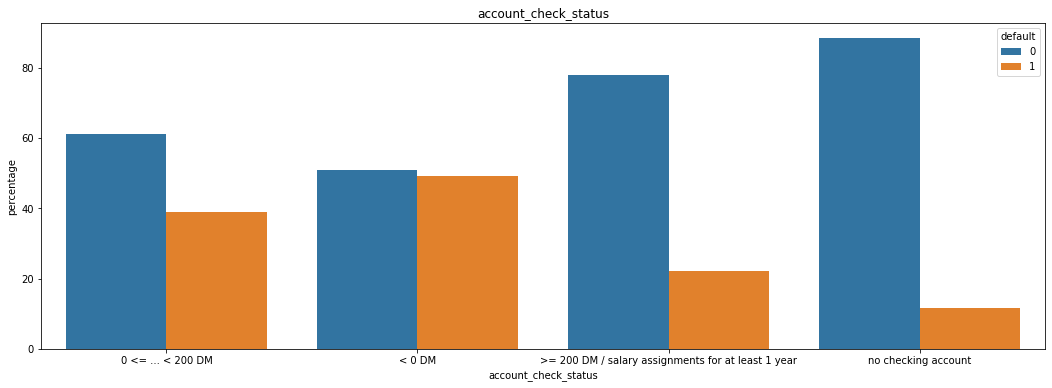

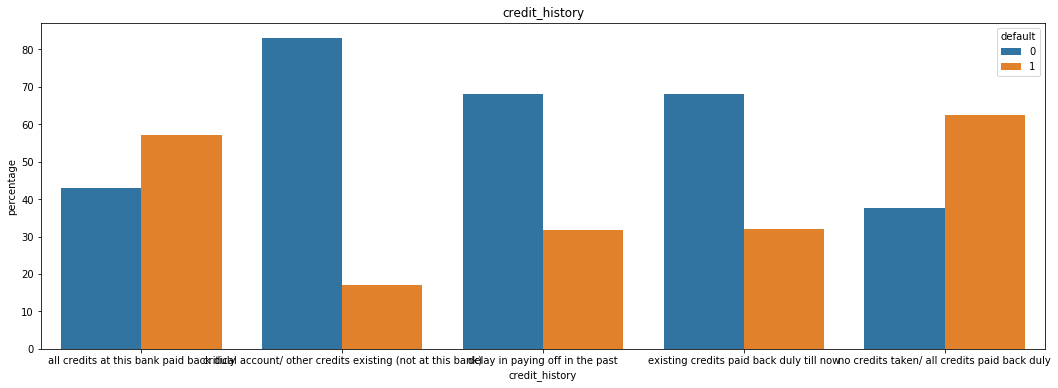

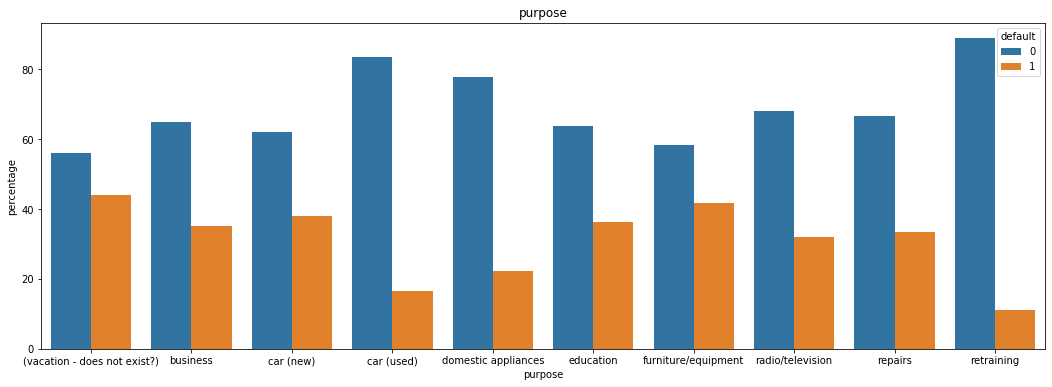

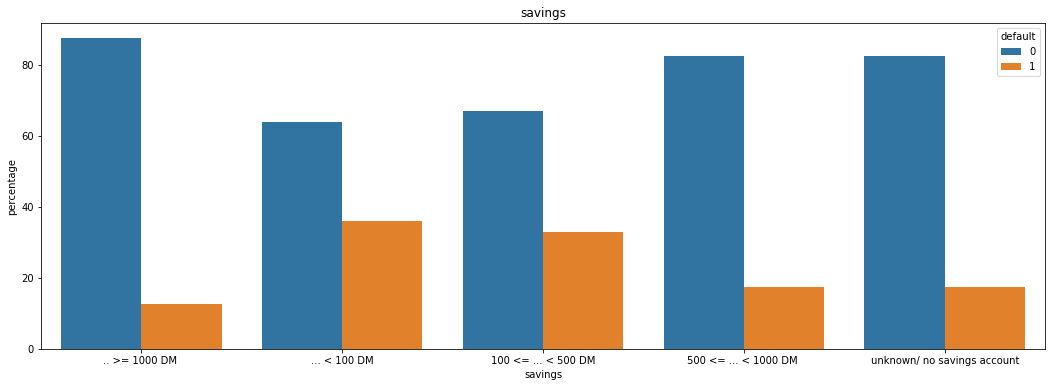

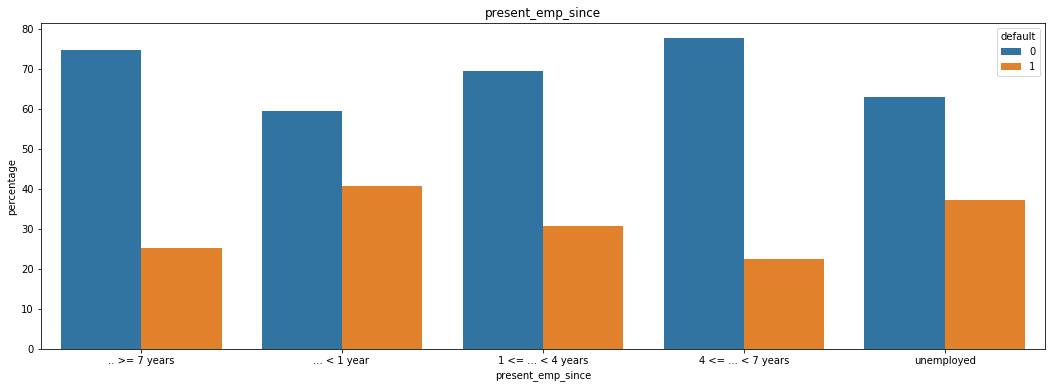

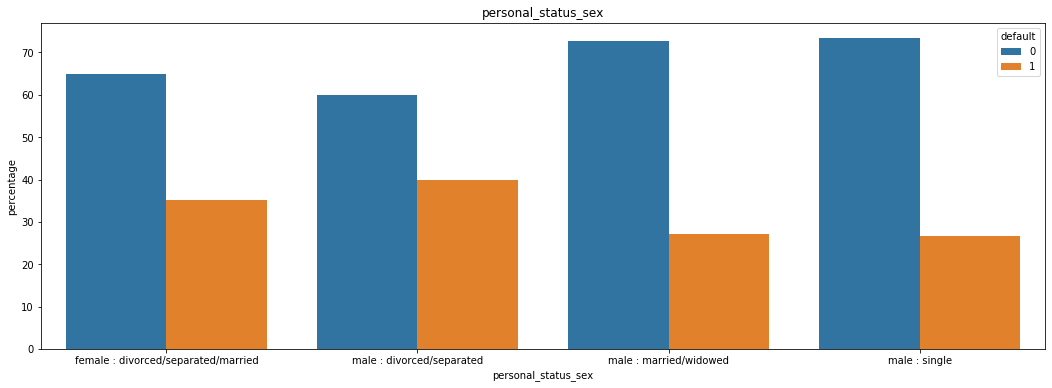

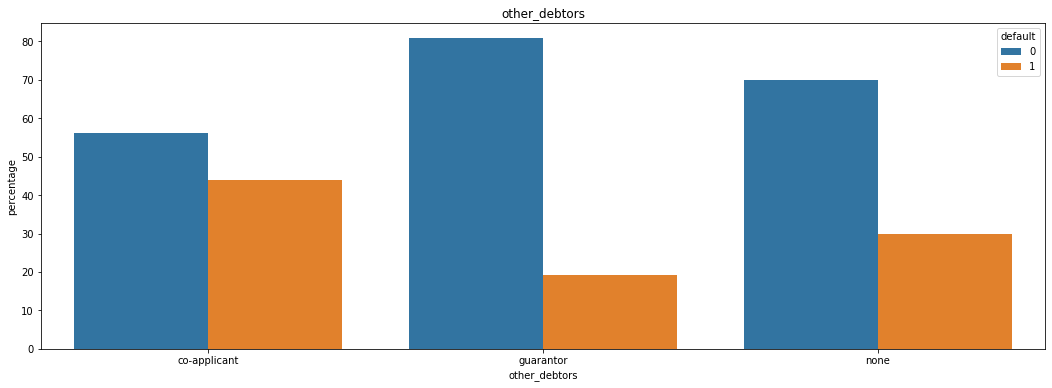

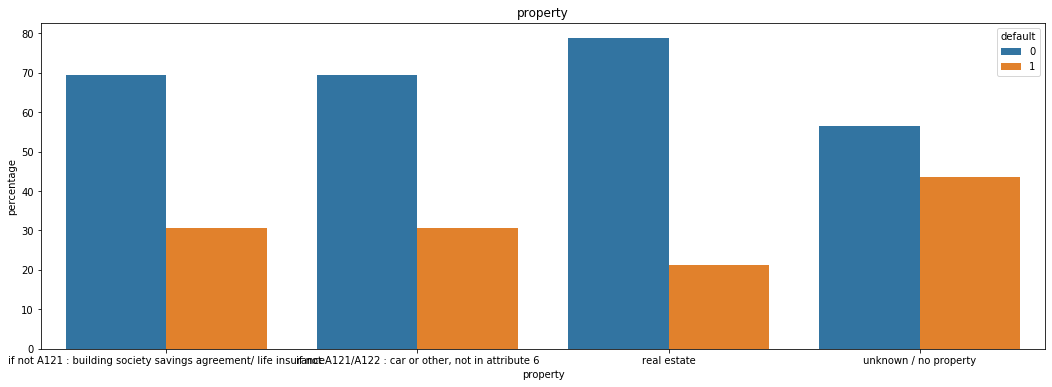

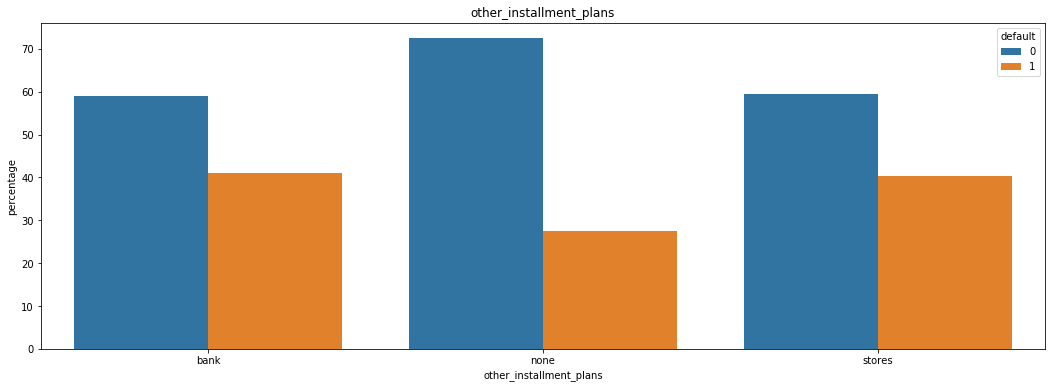

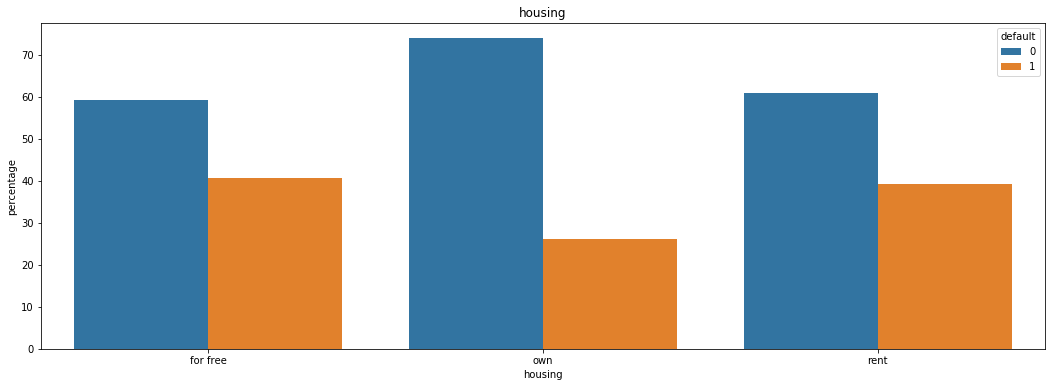

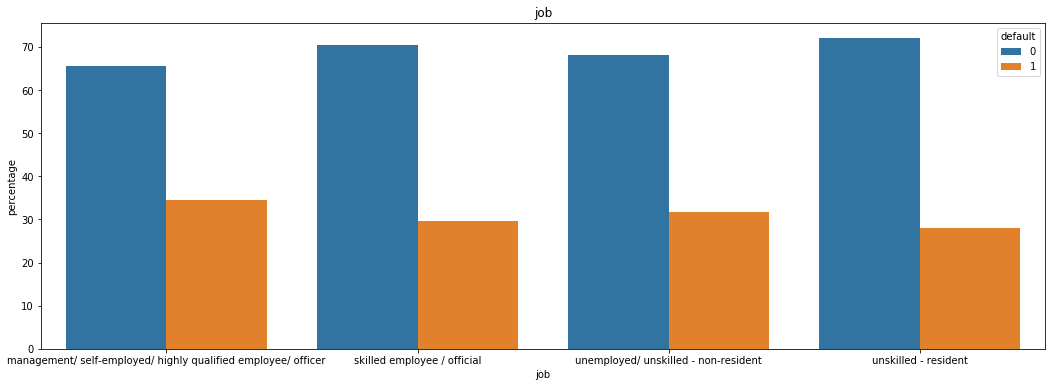

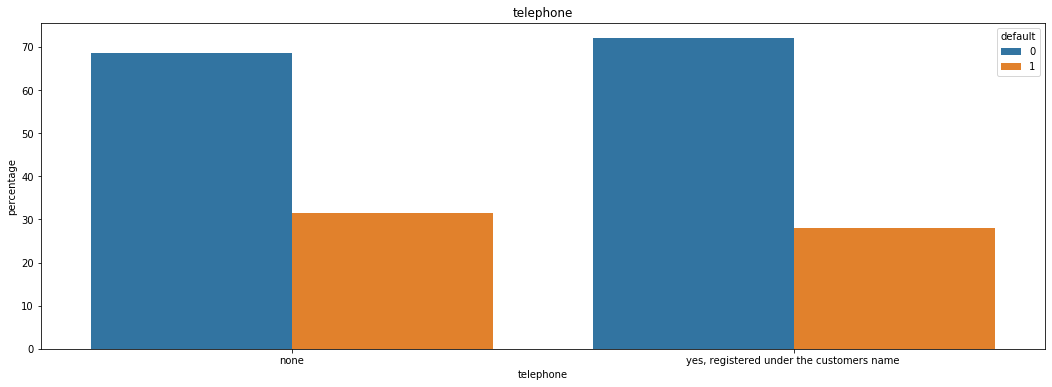

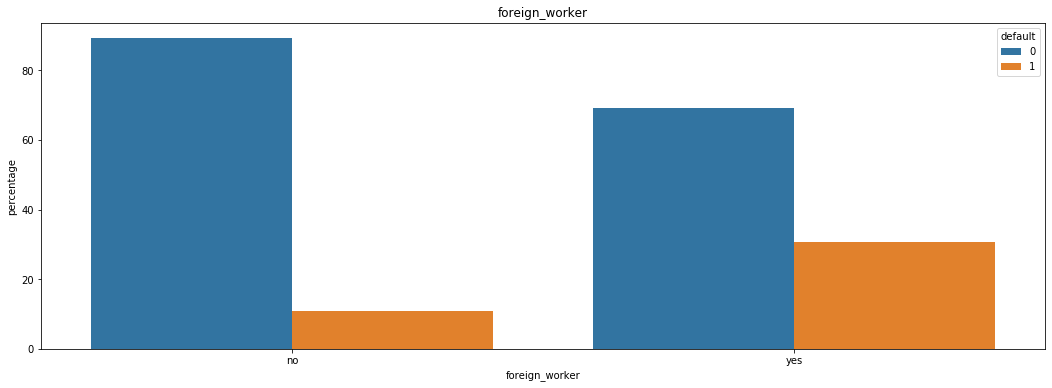

In [15]:
for i in rates_list:
    plt.figure(figsize=(18,6))
    sns.barplot(x=i.iloc[:,0], y=i.iloc[:,2], hue=i.iloc[:,1])
    plt.title(i.columns[0])
    plt.show()

In [16]:
data_num=data.select_dtypes(exclude="object")
data_obj=data.select_dtypes(include="object")

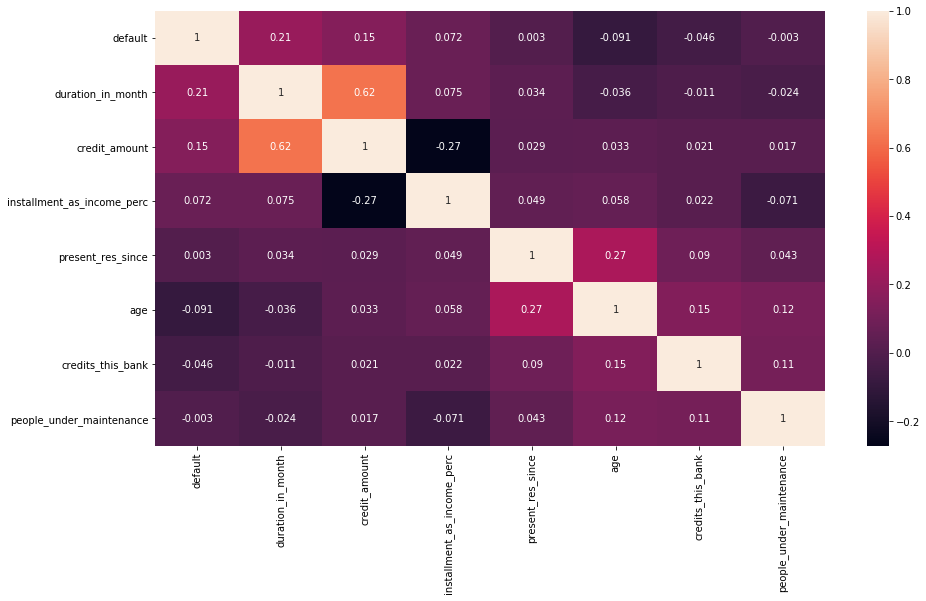

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(data_num.corr(), annot=True)
plt.show()


In [67]:
Y=data["default"]
X=data.drop("default",axis=1)

In [68]:
X=pd.get_dummies(X, drop_first=True)

In [69]:
X.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,6,1169,4,4,67,2,1,1,0,0,...,0,1,0,1,0,1,0,0,1,1
1,48,5951,2,2,22,1,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
2,12,2096,2,3,49,1,2,0,0,1,...,0,1,0,1,0,0,0,1,0,1
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,24,4870,3,4,53,2,2,1,0,0,...,1,1,0,0,0,1,0,0,0,1


In [23]:
#separating X and Y
Y=data["default"]
X=data.drop("default",axis=1)

#making dummes
X=pd.get_dummies(X, drop_first=True)

In [24]:
# we need to add the intercept to data (X) manually
X=sm.add_constant(X)

In [25]:
# separate into train and test data sets
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [26]:
# we need to scale the data for logistic regression
scaler = StandardScaler()
scaler.fit(X0)
X0_scaled = pd.DataFrame(scaler.transform(X0),columns=X0.columns)
X1_scaled = pd.DataFrame(scaler.transform(X1),columns=X1.columns)

# Logistic regression


In [27]:
# initial logistic regression
logit=LogisticRegression(C=0.003, class_weight=None, random_state=42).fit(X0_scaled,Y0)

In [28]:
#getting probabilities
Y0_logit=logit.predict_proba(X0_scaled)[:,1]
Y1_logit=logit.predict_proba(X1_scaled)[:,1]

In [29]:
#calculating roc auc score 
print("ROC_AUC Train:",roc_auc_score(Y0,Y0_logit))
print("ROC_AUC Test:",roc_auc_score(Y1,Y1_logit))

ROC_AUC Train: 0.8163272165087047
ROC_AUC Test: 0.800483770287141


In [30]:
# grid search
param_logit={'class_weight':[None,'balanced'],'C': np.linspace(0.001, 0.1,10)}
gs_logit=GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_logit,
                      scoring="roc_auc", cv=5, verbose=1).fit(X0_scaled,Y0)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.3s finished


In [31]:
best_params_logit = gs_logit.best_params_
best_params_logit

{'C': 0.001, 'class_weight': 'balanced'}

In [32]:
#fitting logit with best params of gridsearch
logit_grid=LogisticRegression(C=best_params_logit['C'], class_weight=best_params_logit['class_weight'],
                              random_state=42).fit(X0_scaled,Y0)

#predict probabilities
Y0_logit=logit_grid.predict_proba(X0_scaled)[:,1]
Y1_logit=logit_grid.predict_proba(X1_scaled)[:,1]

#transform to binary prediction
Y0_logit_bin=np.where(Y0_logit>0.5,1,0) # logit_grid.predict(X0_scaled)
Y1_logit_bin=np.where(Y1_logit>0.5,1,0)

In [33]:
#calculating roc auc score 
print("ROC_AUC Train:",roc_auc_score(Y0, Y0_logit))
print("ROC_AUC Test:",roc_auc_score(Y1, Y1_logit))
print("Recall Train:",recall_score(Y0, Y0_logit_bin))
print("Recall Test:",recall_score(Y1, Y1_logit_bin))
print("Accuracy Train:",accuracy_score(Y0, Y0_logit_bin))
print("Accuracy Test:",accuracy_score(Y1, Y1_logit_bin))

ROC_AUC Train: 0.8114455199300935
ROC_AUC Test: 0.7972066167290887
Recall Train: 0.7807017543859649
Recall Test: 0.7638888888888888
Accuracy Train: 0.7373333333333333
Accuracy Test: 0.74


In [34]:
#Mean cross val score for model with default hyperparameters
print("Mean 5-fold ROC AUC score for not scaled logit:",np.mean(cross_val_score(estimator=logit_grid, X=X,y=Y,cv=5, scoring="roc_auc").round(2)))

C:\Users\Arpine\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Mean 5-fold ROC AUC score for not scaled logit: 0.6639999999999999


In [35]:
print(classification_report(Y0, Y0_logit_bin))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       522
           1       0.55      0.78      0.64       228

    accuracy                           0.74       750
   macro avg       0.72      0.75      0.72       750
weighted avg       0.78      0.74      0.75       750



In [36]:
print(classification_report(Y1, Y1_logit_bin))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       178
           1       0.53      0.76      0.63        72

    accuracy                           0.74       250
   macro avg       0.71      0.75      0.71       250
weighted avg       0.78      0.74      0.75       250



# Decision Tree

In [37]:
dt1=DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=200).fit(X0,Y0)

In [38]:
#getting probabilities
Y0_dt_grid=dt1.predict_proba(X0)[:,1]
Y1_dt_grid=dt1.predict_proba(X1)[:,1]

In [39]:
#calculating roc auc score 
print("ROC_AUC Train:",roc_auc_score(Y0, Y0_dt_grid))
print("ROC_AUC Test:",roc_auc_score(Y1, Y1_dt_grid))

ROC_AUC Train: 0.7073376688848558
ROC_AUC Test: 0.7349016853932584


In [40]:
#setting up the ranges for hyperparameters
param_dt={"max_depth":range(2,4),"min_samples_leaf":range(5,50,5),"class_weight":["balanced", None]}

In [41]:
#Cross-Validated Gridsearch
gs_dt=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_dt, 
                   scoring="roc_auc", cv=5, n_jobs=-1)
gs_dt.fit(X0,Y0)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                     

In [42]:
#let's see the optimal parameters
best_params = gs_dt.best_params_
best_params

{'class_weight': None, 'max_depth': 2, 'min_samples_leaf': 45}

In [43]:
dt1=DecisionTreeClassifier(random_state=42, class_weight=best_params['class_weight'], 
                    max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf']).fit(X0,Y0)

In [44]:
#getting probabilities
Y0_dt_grid=dt1.predict_proba(X0)[:,1]
Y1_dt_grid=dt1.predict_proba(X1)[:,1]
#transform to binary prediction
Y0_dt_grid_bin=np.where(Y0_dt_grid>0.5,1,0)
Y1_dt_grid_bin=np.where(Y1_dt_grid>0.5,1,0)

In [45]:
#calculating roc auc score 
print("ROC_AUC Train:",roc_auc_score(Y0, Y0_dt_grid))
print("ROC_AUC Test:",roc_auc_score(Y1, Y1_dt_grid))
print("Recall Train:",recall_score(Y0, Y0_dt_grid_bin))
print("Recall Test:",recall_score(Y1, Y1_dt_grid_bin))
print("Accuracy Train:",accuracy_score(Y0, Y0_dt_grid_bin))
print("Accuracy Test:",accuracy_score(Y1, Y1_dt_grid_bin))

ROC_AUC Train: 0.7214072057538483
ROC_AUC Test: 0.7418851435705367
Recall Train: 0.4649122807017544
Recall Test: 0.4444444444444444
Accuracy Train: 0.716
Accuracy Test: 0.728


In [46]:
print("Mean 5-fold ROC AUC score for Decision Tree:",np.mean(cross_val_score(estimator=dt1, X=X,y=Y,cv=5, scoring="roc_auc").round(2)))

Mean 5-fold ROC AUC score for Decision Tree: 0.708


In [47]:
#property returning feature importances as array
dt1.feature_importances_

array([0.        , 0.21405526, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.71693711, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06900763, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [48]:
#making a dataframe for convenient usage
feat_imp=pd.DataFrame(dt1.feature_importances_,index=X.columns,
                      columns=["Feature_imp"])
feat_imp=feat_imp.sort_values(by="Feature_imp",ascending=False)
feat_imp.head()

,Feature_imp
account_check_status_no checking account,0.716937
duration_in_month,0.214055
other_installment_plans_none,0.069008
other_debtors_none,0.000000
savings_unknown/ no savings account,0.000000


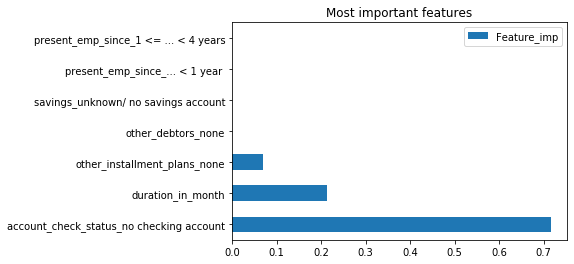

In [49]:
#visualizing feature importances
feat_imp.head(7).plot.barh()
plt.title("Most important features")
plt.show()